In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [19]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [22]:
df['Price'] = boston.target

In [23]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

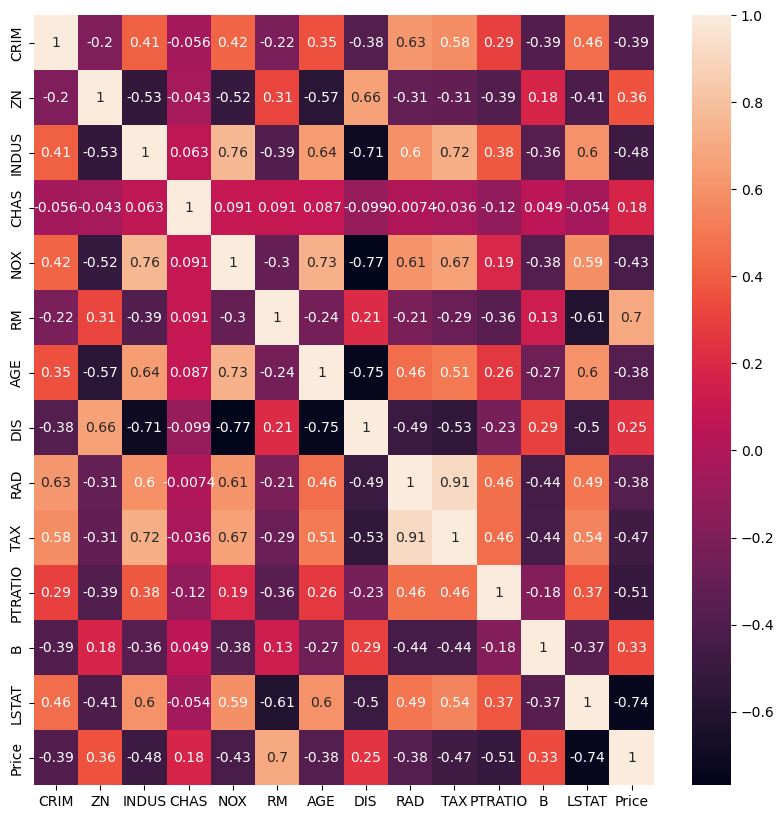

In [25]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

In [26]:
#INDUS dan NOX multicolinearity
df.drop(columns = ['RAD'], inplace = True)

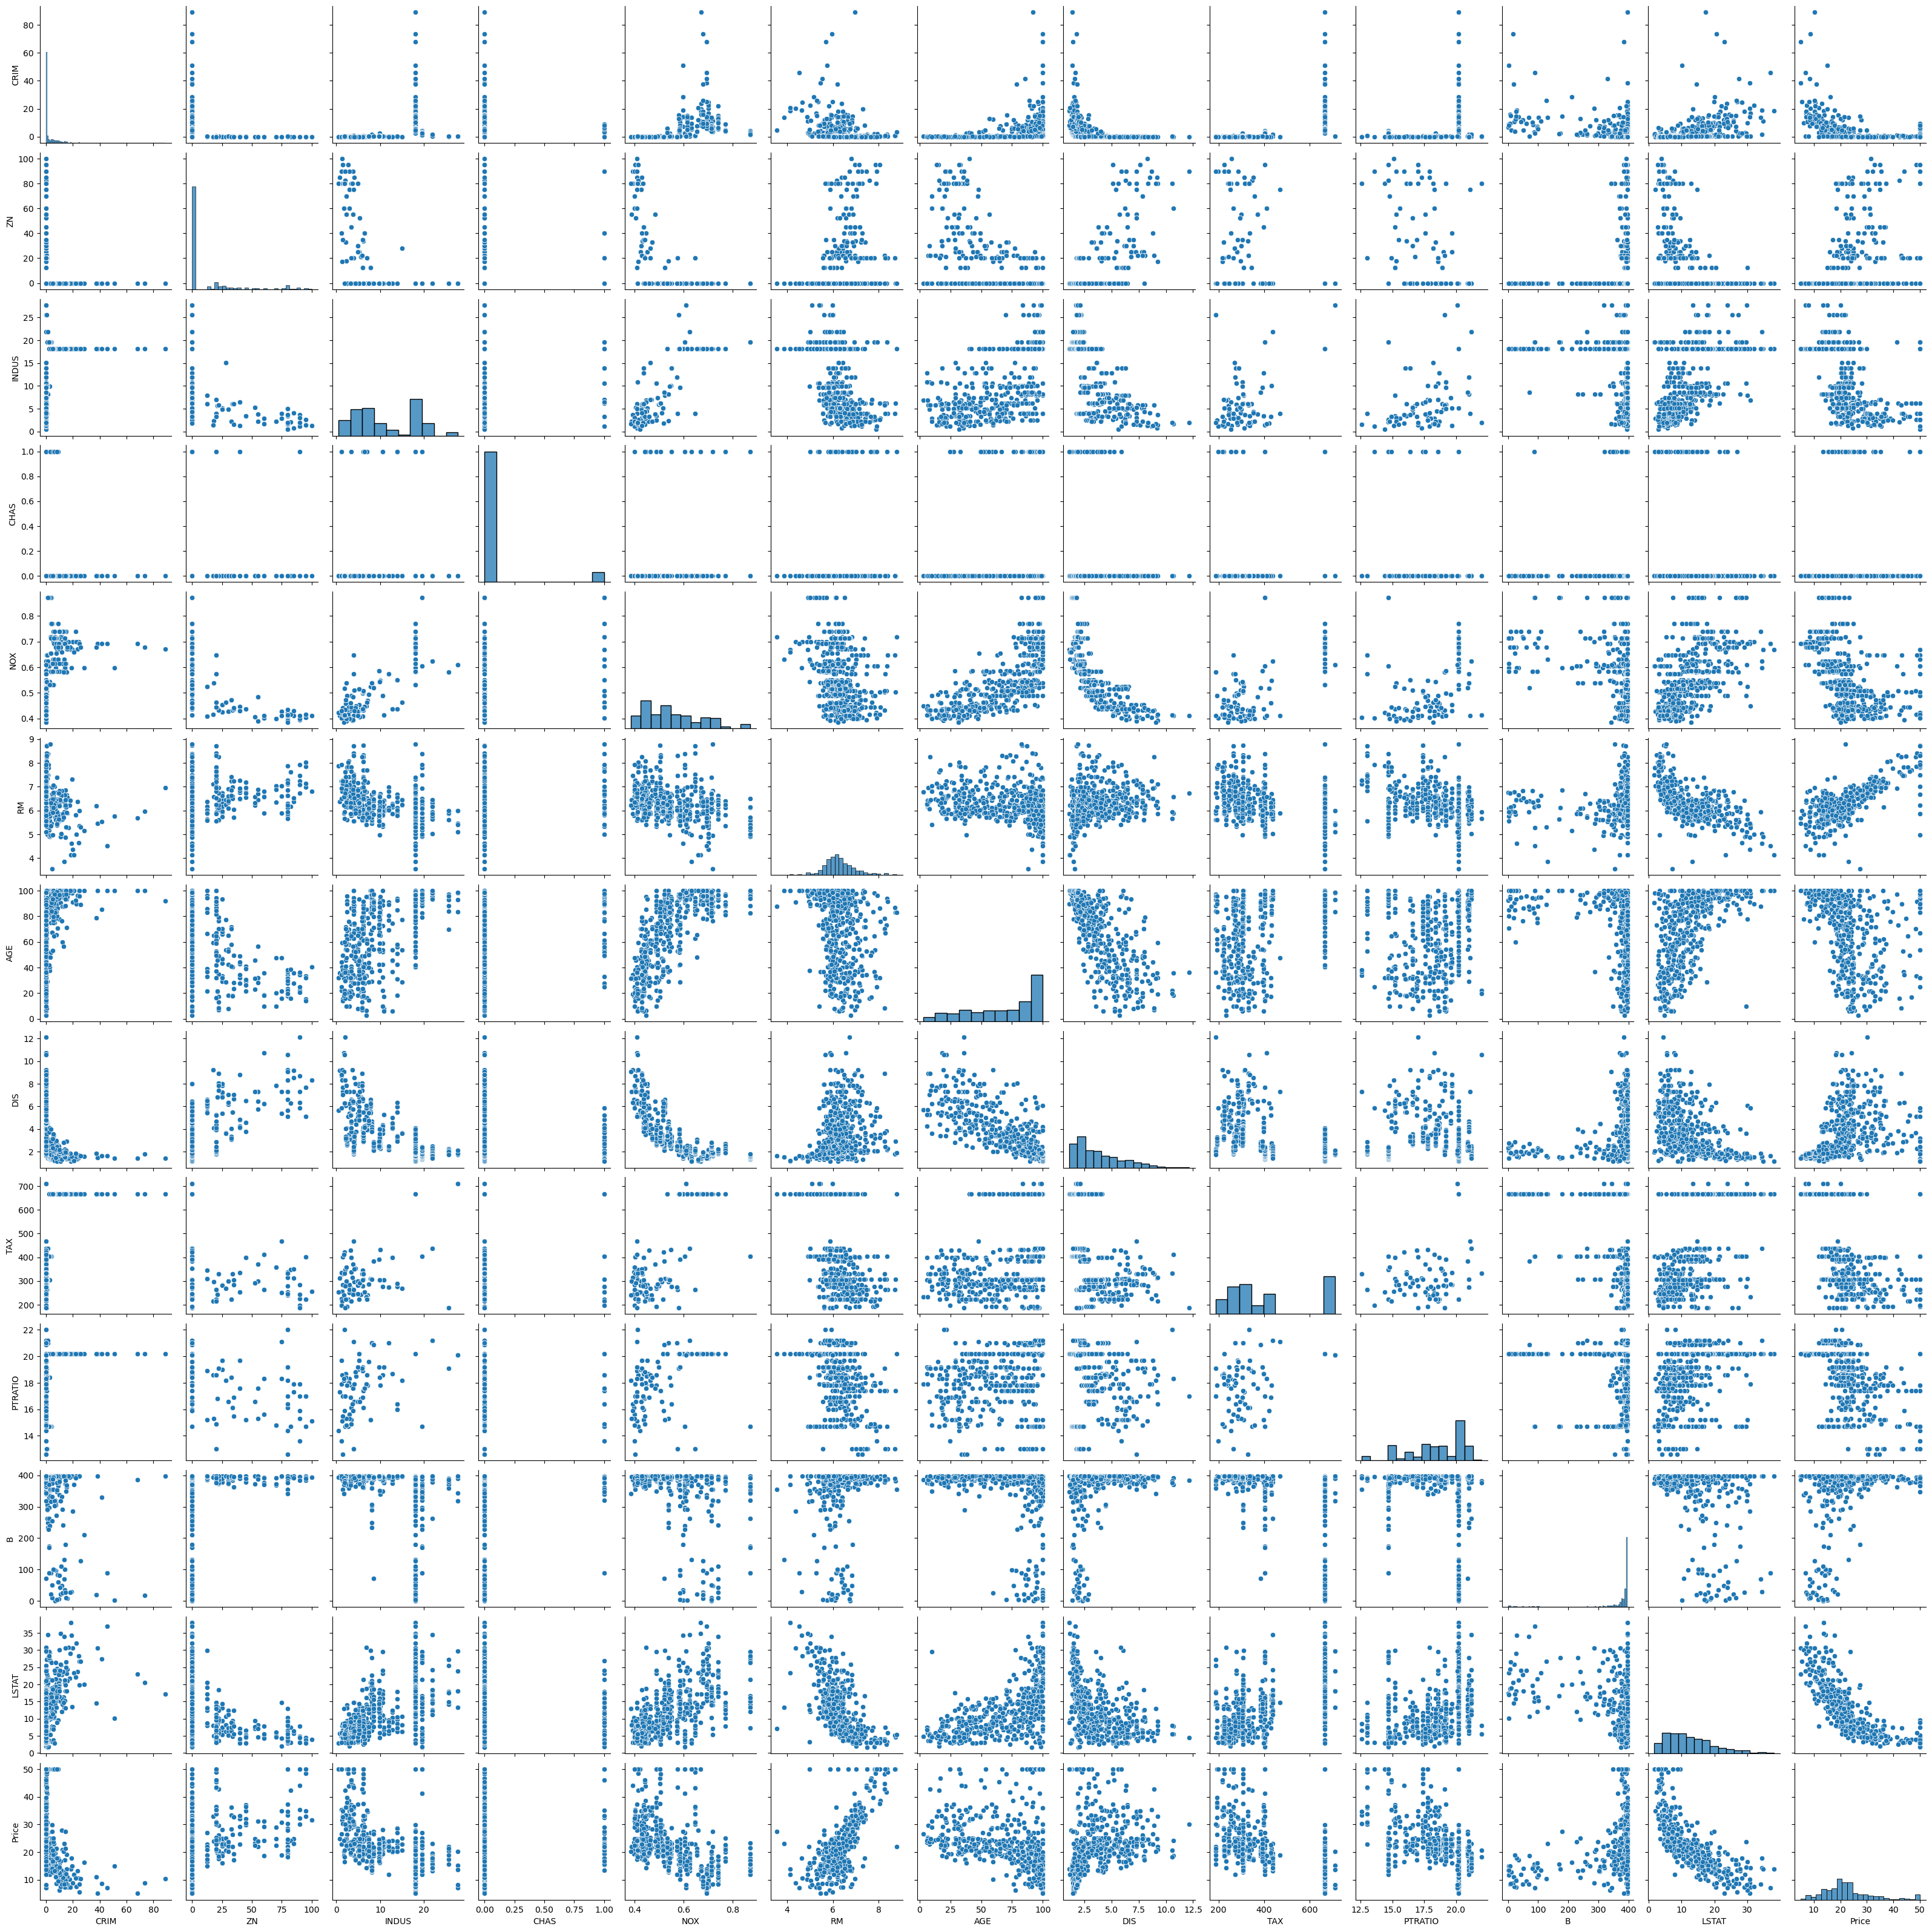

In [27]:
sns.pairplot(df)

In [28]:
features = df.columns[0:11]
target = df.columns[-1]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [29]:
print("train set: {} ".format(X_train.shape))
print("test set: {} ".format(X_test.shape))

train set: (354, 11) 
test set: (152, 11) 


In [30]:
#standard scaler: untuk melakukan normalisasi data agar datanya tidak memiliki penyimpangan yang besar

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  Price    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

train_score_lr = lr_model.score(X_train, y_train)
test_score_lr = lr_model.score(X_test, y_test)

print("train score for Linear Model: {}".format(train_score_lr))
print("test score for Linear Model: {}".format(test_score_lr))

train score for Linear Model: 0.6481302077002449
test score for Linear Model: 0.7299179819474241


In [35]:
#kurang faham sebenernya ini maksudnya apa soalnya, katanya kalo r2 score nya lebih kecil daripada test score itu
#ada kemungkinan overfitting

def adj_r2(X, y, lr_model):
    r2 = lr_model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [36]:
print("r2 train score for Linear Model: {}".format(adj_r2(X_train, y_train, lr_model)))
print("r2 test score for Linear Model: {}".format(adj_r2(X_test, y_test, lr_model)))

r2 train score for Linear Model: 0.6368127582403111
r2 test score for Linear Model: 0.7086972519575789


## Ridge Regression

In [37]:
from sklearn.linear_model import RidgeCV

In [106]:
terms = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = terms, cv = 10)
# y_train = scaler.fit_transform(y_train)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.85043786, 0.77047887, 7.26082515, 2.08902262, 8.42220571,
       1.25285959, 2.15152894, 5.65080448, 0.74623265, 2.99728718,
       4.66322765, 2.7693386 , 3.4103089 , 6.59554154, 1.68633938,
       6.29472491, 7.94774361, 3.02478491, 5.48871816, 2.60383121,
       2.43608771, 6.17609746, 9.13317436, 9.1551073 , 6.5412405 ,
       1.44041295, 8.85780715, 5.40877338, 9.50073163, 8.67062734,
       1.24343471, 1.20318598, 3.47023256, 4.1292215 , 5.68162231,
       6.77133055, 1.15528748, 7.48888877, 7.78553333, 6.19786967,
       0.69279528, 7.05631681, 3.09536696, 9.50352531, 0.57049475,
       2.54864814, 5.71923824, 8.89243791, 3.05757248, 2.1898654 ]),
        cv=10)

In [107]:
best_alpha = ridge_cv.alpha_
best_alpha

9.503525307591332

In [115]:
ridge_model = Ridge(alpha = 0.85043786)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.85043786)

In [116]:
train_score_ridge = ridge_model.score(X_train, y_train)
test_score_ridge = ridge_model.score(X_test, y_test)

In [117]:
print("train score for Ridge Regression: {}".format(train_score_ridge))
print("test score for Ridge Regression: {}".format(test_score_ridge))

train score for Ridge Regression: 0.6481225989034212
test score for Ridge Regression: 0.7298912099306645


In [118]:
print("r2 train score for Linear Model: {}".format(adj_r2(X_train, y_train, ridge_model)))
print("r2 test score for Linear Model: {}".format(adj_r2(X_test, y_test, ridge_model)))

r2 train score for Linear Model: 0.6368049047161043
r2 test score for Linear Model: 0.7086683764252166


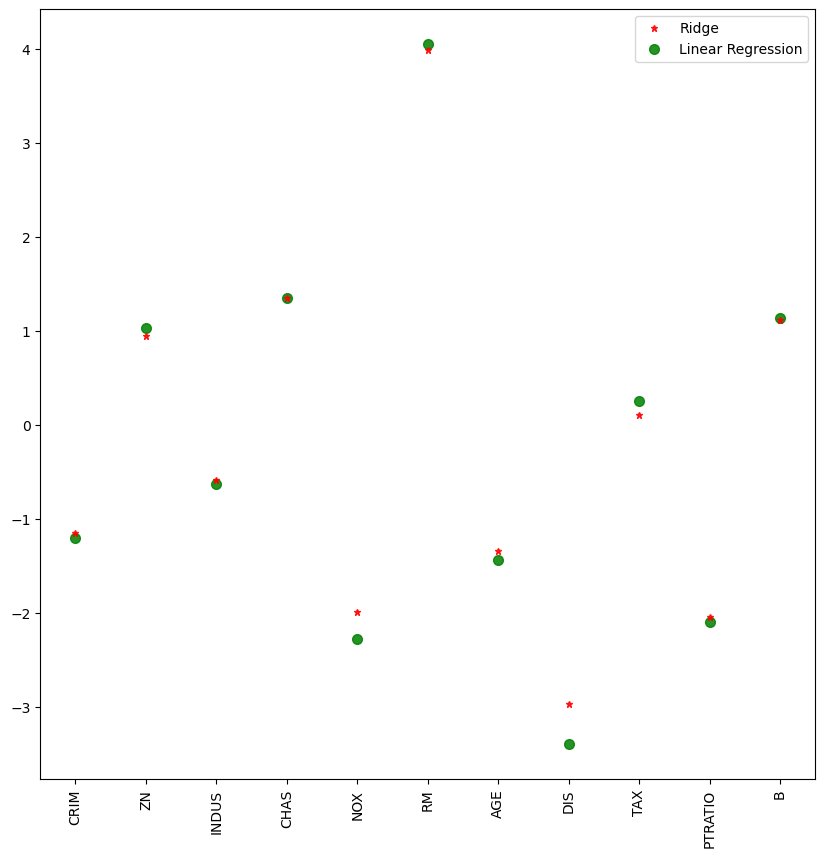

In [114]:
plt.figure(figsize = (10, 10))
plt.plot(features, ridge_model.coef_, alpha = 0.85043786, linestyle = 'none', marker = '*', markersize = 5, color = 'red', label = 'Ridge', zorder = 7)
plt.plot(features, lr_model.coef_, alpha = 0.85043786, linestyle = 'none', marker = 'o', markersize = 7, color = 'green', label = 'Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [120]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [122]:
lasso_cv.alpha_

0.0468048670206641

In [123]:
lasso_model = Lasso(alpha = lasso_cv.alpha_)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0468048670206641)

In [124]:
train_score_lasso = lasso_model.score(X_train, y_train)
test_score_lasso = lasso_model.score(X_test, y_test)

In [125]:
print("train score for Lasso Regression: {}".format(train_score_lasso))
print("test score for Lasso Regression: {}".format(test_score_lasso))

train score for Lasso Regression: 0.6474641970741017
test score for Lasso Regression: 0.7320615108489633


In [126]:
print("r2 train score for Lasso Regression: {}".format(adj_r2(X_train, y_train, lasso_model)))
print("r2 test score for Lasso Regression: {}".format(adj_r2(X_test, y_test, lasso_model)))

r2 train score for Lasso Regression: 0.6361253262197599
r2 test score for Lasso Regression: 0.7110092009870961
